In [1]:
import pandas as pd # imports
import chants
import numpy as np
from numpy import array
import datetime
import scipy
import os
import vsm
import chants
Language_VSM = pd.read_csv('pmi_retro.csv',index_col=0)

In [3]:
start = '2011-01-10' # this chunk is not relevant code for now
end = '2011-12-29'
dates = pd.date_range(start,end)
spy = chants.get_data(['SPY'],dates)
spy.index
dates1 = [date for date in dates if date in spy.index]
symbols = pd.read_csv('MarketVSM_prototype',index_col=0).index
historical_returns = chants.get_data(symbols,dates1)
historical_returns.dropna(axis=0,inplace=True)

B = pd.read_pickle('test3')
df2 = pd.read_pickle('holy')
for col in CV:
    if CV[col][0][0] * 0 != 0.0:
        CV.drop(col, inplace=True, axis=1)
context_sim_vecs = df2.T
context_sim_vecs.columns = CV.index

### Initial Data
 There are 575 stocks in this dataset and it's quite dirty because I read all the files in a folder that included real stocks and toy stocks (FAKE1 for example). I have 12 years in total but I only chose 1 year for this VSM. Any range of dates can easily be accepted, but as of now using 4 or 5 years will probably take a few hours.
 
I started with historical returns.

In [176]:
historical_returns

,A,AA,AAPL,ABC,ABKFQ,ABT,ACAS,ACE,ACN,ADBE,...,XEL,XL,XLNX,XOM,XRAY,XRX,YHOO,YUM,ZION,ZMH
2011-01-10,42.01,16.19,340.99,33.96,0.12,45.07,7.98,58.30,46.65,32.96,...,22.18,21.44,29.01,72.02,34.75,11.07,16.60,47.95,24.04,52.70
2011-01-11,42.73,16.03,340.18,34.29,0.12,44.97,8.14,58.57,47.29,32.98,...,22.10,21.47,29.29,72.56,35.01,11.14,16.58,47.64,24.22,54.58
2011-01-12,42.92,15.95,342.95,34.09,0.12,45.14,8.48,58.68,48.38,33.57,...,22.16,21.58,29.76,73.41,35.96,11.19,16.65,47.77,23.93,55.38
2011-01-13,42.76,15.46,344.20,34.60,0.12,44.94,8.39,58.70,48.36,33.38,...,22.07,22.24,29.66,73.54,35.98,10.98,16.75,47.52,23.71,55.12
2011-01-14,43.05,15.68,346.99,34.65,0.12,44.49,8.41,58.62,48.49,33.79,...,22.09,22.83,30.43,74.62,35.97,11.27,16.81,46.49,24.50,55.45
2011-01-18,44.13,15.98,339.19,35.37,0.12,44.78,8.56,58.50,48.83,34.18,...,22.38,22.87,30.50,75.45,36.39,11.34,16.50,47.86,24.29,55.84
2011-01-19,42.22,15.77,337.39,34.76,0.11,44.91,8.14,58.41,48.68,33.91,...,22.32,22.53,29.78,75.00,35.67,11.20,16.31,47.90,23.84,55.61
2011-01-20,42.08,15.69,331.26,34.93,0.12,45.50,8.04,58.55,49.59,33.49,...,22.55,21.97,30.01,74.53,35.64,10.82,16.23,47.27,23.65,55.52
2011-01-21,41.90,15.50,325.32,35.30,0.11,45.47,8.10,58.35,49.49,33.27,...,22.50,21.97,30.03,75.71,35.53,10.81,15.97,46.91,24.22,56.04
2011-01-24,42.56,16.13,336.01,35.49,0.12,45.70,8.05,58.54,49.91,34.03,...,22.66,22.25,30.51,75.34,35.59,10.90,16.09,46.94,23.66,55.11


### Matrix B
This was probably the hardest part to code and it's pretty hacky. I'm skipping the code and reading in the context window dataframe, B, it returns. I go in more detail below.

In [5]:
B.T

,2011-01-10,2011-01-11,2011-01-12,2011-01-13,2011-01-14,2011-01-18,2011-01-19,2011-01-20,2011-01-21,2011-01-24,...,2011-12-15,2011-12-16,2011-12-19,2011-12-20,2011-12-21,2011-12-22,2011-12-23,2011-12-27,2011-12-28,2011-12-29
A,"[1.017437636231533, 1.017437636231533, 1.01743...","[1.034875272463066, 1.034875272463066, 1.03713...","[1.039476870913054, 1.0417475728155339, 1.0397...","[1.0378640776699029, 1.0358527131782944, 1.032...","[1.042877906976744, 1.039352969579913, 1.02475...","[1.0654273297923709, 1.050464175196382, 1.0327...","[1.0049988098071887, 0.9880645916218114, 0.983...","[0.984788205008191, 0.9804287045666356, 0.9840...","[0.9762348555452003, 0.979887745556595, 0.9732...","[0.9953227315247897, 0.9886178861788619, 0.964...",...,"[0.9125548245614036, 0.971970802919708, 0.9468...","[0.9722627737226277, 0.947098976109215, 0.9922...","[0.9405574516496019, 0.985399284862932, 1.0024...","[1.0253277711561382, 1.0430433464686266, 1.050...","[1.0363746589875718, 1.0433323161428134, 1.027...","[1.0579798596277081, 1.0414538900570742, 1.041...","[1.057074196455392, 1.0567567567567568, 1.0641...","[1.0534534534534534, 1.060780163289991, 1.0194...","[1.026307831871787, 0.986341179889567, 0.99268...","[1.0139494333042722, 1.0204738227551917, 1.006..."
AA,"[0.998150431565968, 0.998150431565968, 0.99815...","[0.9882860665844637, 0.9882860665844637, 0.985...","[0.9833538840937115, 0.9809348093480933, 0.993...","[0.95079950799508, 0.9626400996264012, 0.95905...","[0.9763387297633873, 0.9727047146401985, 0.968...","[0.9913151364764268, 0.987029030265596, 0.9968...","[0.974058060531192, 0.9837804117280099, 0.9887...","[0.9787897691827822, 0.9836990595611286, 1.014...","[0.9717868338557994, 1.0025873221216042, 0.988...","[1.0433376455368693, 1.0286989795918366, 1.009...",...,"[0.8867346938775509, 0.9264392324093815, 0.909...","[0.929637526652452, 0.9130890052356021, 0.9416...","[0.8848167539267014, 0.9125269978401728, 0.944...","[0.949244060475162, 0.982122905027933, 0.99322...","[0.9787709497206705, 0.9898305084745763, 1.008...","[0.9966101694915255, 1.0149597238204835, 1.011...","[1.0092059838895282, 1.0057339449541283, 1.037...","[0.9977064220183485, 1.029585798816568, 0.9897...","[0.9988165680473373, 0.9601820250284414, 0.963...","[0.9726962457337885, 0.9760273972602741, 0.969..."
AAPL,"[1.0337102494922241, 1.0337102494922241, 1.033...","[1.0312547367144633, 1.0312547367144633, 1.022...","[1.0396519841149543, 1.0312114742760923, 1.032...","[1.0349700814866043, 1.035811014143846, 1.0284...","[1.044207041829672, 1.0367814031313494, 1.0175...","[1.0134755587426796, 0.9947212528226634, 0.997...","[0.9894425056453268, 0.9917984596390146, 0.983...","[0.9737785878064553, 0.9659133984545852, 0.962...","[0.9485930893716286, 0.9451481696687972, 0.937...","[0.976205694363742, 0.9683564367849217, 0.9906...",...,"[0.9739049634772733, 0.9699992287719478, 0.962...","[0.9753207023316794, 0.9679797928254325, 0.972...","[0.9710159718324233, 0.9754459708837399, 0.983...","[1.0105085093295059, 1.0183649748159629, 1.041...","[1.01965646390288, 1.0427937447168216, 1.04622...","[1.0483146661031277, 1.0517597794975089, 1.046...","[1.0643750662567582, 1.0585677007828356, 1.055...","[1.0669495769524764, 1.063613432129907, 1.0267...","[1.0534447422355353, 1.0168924060264801, 1.015...","[1.023157307360625, 1.021861384132131, 1.01647..."
ABC,"[1.0231997589635433, 1.0231997589635433, 1.023...","[1.0331425128050618, 1.0331425128050618, 1.017...","[1.0271166013859598, 1.0115727002967358, 1.0, ...","[1.0267062314540059, 1.0149603989439717, 1.012...","[1.0164271047227924, 1.014344262295082, 1.0203...","[1.0354215456674474, 1.0415194346289751, 1.031...","[1.0235571260306242, 1.0137066200058327, 1.019...","[1.0186643336249637, 1.0246406570841888, 1.009...","[1.0354942798474625, 1.0202312138728322, 1.018...","[1.0257225433526012, 1.0242424242424244, 1.003...",...,"[0.9784589892294946, 0.986908077994429, 0.9844...","[1.013091922005571, 1.010558488469019, 1.02537...","

#### Context Window
The window length for this one is 12. I have a version that is length 4 as well. Easily changing window lengths is not possible for now since I hardcoded each window. I know it would make more sense to have the windows be like   
|12_..._4__3__2__1__|**self**                               
or the other way around (whichever is like rolling mean)

but when I made this I was more familiar with the language style of basing the window around a center word so it's instead

|-6..._-2__-1__center__1__2...6|

#### Visualizing a context window for one stock, eg one iteration of the window scan
The top 6 values in the printed array are for the returns (relative to the center date) from the 6 trading dates before the 2011-01-10. The center date is the newline split and then you have the returns from the 6 dates ahead. This would be much easier to imagine if the window was not centered style since it would pretty much be a mini returns plot. A bit confusing but you can get the spirit.


In [57]:
print(B['AAPL']['2011-01-10'])

[1.03371025 1.03371025 1.03371025 1.02531798 1.02615107 1.01885383
 1.00238109 0.99428488 0.99067403 0.99428488 1.00530676 1.01067014]


#### Context Windows as Vectors
I'm glossing over what different shapes mean since that's more connected to how you define the window. If you imagine the center date in 
```
[1.03371025 1.03371025 1.03371025 1.02531798 1.02615107 1.01885383
 1.00238109 0.99428488 0.99067403 0.99428488 1.00530676 1.01067014]
```
as 1, it looks like this. With 6 on the x-axis being the center date. You can see it's past and future returns.

<AxesSubplot:>

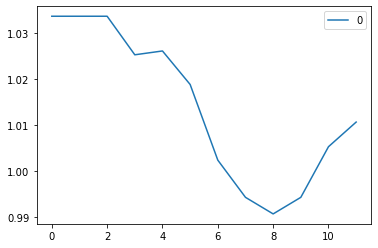

In [59]:
pd.DataFrame([1.03371025,1.03371025,1.03371025,1.02531798,1.02615107,1.01885383,1.00238109,0.99428488,0.99067403,0.99428488,1.00530676,1.01067014]).plot()

This is one element in the Context Windows Matrix. Specifically, the first entry in AAPL. Let's look at a few stocks on the same day and get a sense their shapes of return movement. This time I won't insert the center date

<AxesSubplot:>

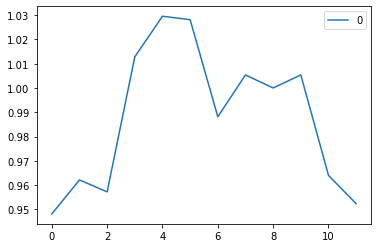

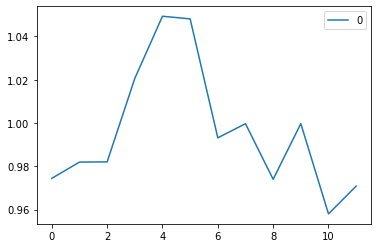

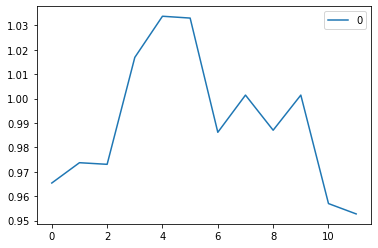

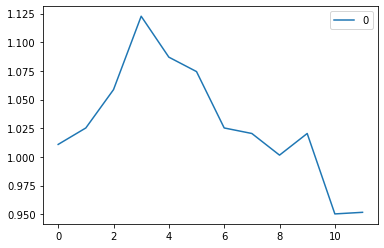

In [67]:
pd.DataFrame(B['GE']['2011-08-23']).plot()
pd.DataFrame(B['AAPL']['2011-08-23']).plot()
pd.DataFrame(B['SPY']['2011-08-23']).plot()
pd.DataFrame(B['AMD']['2011-08-23']).plot()

Hopefully this gives you a sense of what the Context Windows matrix, B contains

In [171]:
CV.T.head() # context window scan was on total timeframe which is why there are no blanks in the starting dates (it's a slice)

,2011-01-10,2011-01-11,2011-01-12,2011-01-13,2011-01-14,2011-01-18,2011-01-19,2011-01-20,2011-01-21,2011-01-24,...,2011-12-15,2011-12-16,2011-12-19,2011-12-20,2011-12-21,2011-12-22,2011-12-23,2011-12-27,2011-12-28,2011-12-29
A,"[1.017437636231533, 1.017437636231533, 1.01743...","[1.034875272463066, 1.034875272463066, 1.03713...","[1.039476870913054, 1.0417475728155339, 1.0397...","[1.0378640776699029, 1.0358527131782944, 1.032...","[1.042877906976744, 1.039352969579913, 1.02475...","[1.0654273297923709, 1.050464175196382, 1.0327...","[1.0049988098071887, 0.9880645916218114, 0.983...","[0.984788205008191, 0.9804287045666356, 0.9840...","[0.9762348555452003, 0.979887745556595, 0.9732...","[0.9953227315247897, 0.9886178861788619, 0.964...",...,"[0.9125548245614036, 0.971970802919708, 0.9468...","[0.9722627737226277, 0.947098976109215, 0.9922...","[0.9405574516496019, 0.985399284862932, 1.0024...","[1.0253277711561382, 1.0430433464686266, 1.050...","[1.0363746589875718, 1.0433323161428134, 1.027...","[1.0579798596277081, 1.0414538900570742, 1.041...","[1.057074196455392, 1.0567567567567568, 1.0641...","[1.0534534534534534, 1.060780163289991, 1.0194...","[1.026307831871787, 0.986341179889567, 0.99268...","[1.0139494333042722, 1.0204738227551917, 1.006..."
AA,"[0.998150431565968, 0.998150431565968, 0.99815...","[0.9882860665844637, 0.9882860665844637, 0.985...","[0.9833538840937115, 0.9809348093480933, 0.993...","[0.95079950799508, 0.9626400996264012, 0.95905...","[0.9763387297633873, 0.9727047146401985, 0.968...","[0.9913151364764268, 0.987029030265596, 0.9968...","[0.974058060531192, 0.9837804117280099, 0.9887...","[0.9787897691827822, 0.9836990595611286, 1.014...","[0.9717868338557994, 1.0025873221216042, 0.988...","[1.0433376455368693, 1.0286989795918366, 1.009...",...,"[0.8867346938775509, 0.9264392324093815, 0.909...","[0.929637526652452, 0.9130890052356021, 0.9416...","[0.8848167539267014, 0.9125269978401728, 0.944...","[0.949244060475162, 0.982122905027933, 0.99322...","[0.9787709497206705, 0.9898305084745763, 1.008...","[0.9966101694915255, 1.0149597238204835, 1.011...","[1.0092059838895282, 1.0057339449541283, 1.037...","[0.9977064220183485, 1.029585798816568, 0.9897...","[0.9988165680473373, 0.9601820250284414, 0.963...","[0.9726962457337885, 0.9760273972602741, 0.969..."
AAPL,"[1.0337102494922241, 1.0337102494922241, 1.033...","[1.0312547367144633, 1.0312547367144633, 1.022...","[1.0396519841149543, 1.0312114742760923, 1.032...","[1.0349700814866043, 1.035811014143846, 1.0284...","[1.044207041829672, 1.0367814031313494, 1.0175...","[1.0134755587426796, 0.9947212528226634, 0.997...","[0.9894425056453268, 0.9917984596390146, 0.983...","[0.9737785878064553, 0.9659133984545852, 0.962...","[0.9485930893716286, 0.9451481696687972, 0.937...","[0.976205694363742, 0.9683564367849217, 0.9906...",...,"[0.9739049634772733, 0.9699992287719478, 0.962...","[0.9753207023316794, 0.9679797928254325, 0.972...","[0.9710159718324233, 0.9754459708837399, 0.983...","[1.0105085093295059, 1.0183649748159629, 1.041...","[1.01965646390288, 1.0427937447168216, 1.04622...","[1.0483146661031277, 1.0517597794975089, 1.046...","[1.0643750662567582, 1.0585677007828356, 1.055...","[1.0669495769524764, 1.063613432129907, 1.0267...","[1.0534447422355353, 1.0168924060264801, 1.015...","[1.023157307360625, 1.021861384132131, 1.01647..."
ABC,"[1.0231997589635433, 1.0231997589635433, 1.023...","[1.0331425128050618, 1.0331425128050618, 1.017...","[1.0271166013859598, 1.0115727002967358, 1.0, ...","[1.0267062314540059, 1.0149603989439717, 1.012...","[1.0164271047227924, 1.014344262295082, 1.0203...","[1.0354215456674474, 1.0415194346289751, 1.031...","[1.0235571260306242, 1.0137066200058327, 1.019...","[1.0186643336249637, 1.0246406570841888, 1.009...","[1.0354942798474625, 1.0202312138728322, 1.018...","[1.0257225433526012, 1.0242424242424244, 1.003...",...,"[0.9784589892294946, 0.986908077994429, 0.9844...","[1.013091922005571, 1.010558488469019, 1.02537...","

If we're trying to make comparisons with the words vsm, this is like step 0--- imposing a sense of context and co-occurance on some initial dataset. 

#### What kind of Matrix is B?
B is kind of like a term-document matrix. You can treat the stretch of returns for some timeframe as a corpus. It's a container of documents. And like normal containers, we can say a document is a page or a paragraph or five words... it's up to us to define the context. In this case, I defined it as 12 days. I'll skip over what it means to choose a large window or small window, as well as different scaling options. The big difference between traditional term-documents and this is sparsity. Here, we're guaranteed an entry for each term, so there's no sparsity at all. So c1 (2011-01-01) contains an entry for each term (stock) and instead of a scalar count, the entry is a **vector** whose dimension is our window length. 

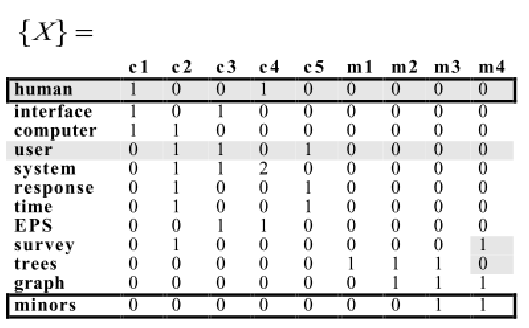

In [6]:
B.T.head()

,2011-01-10,2011-01-11,2011-01-12,2011-01-13,2011-01-14,2011-01-18,2011-01-19,2011-01-20,2011-01-21,2011-01-24,...,2011-12-15,2011-12-16,2011-12-19,2011-12-20,2011-12-21,2011-12-22,2011-12-23,2011-12-27,2011-12-28,2011-12-29
A,"[1.017437636231533, 1.017437636231533, 1.01743...","[1.034875272463066, 1.034875272463066, 1.03713...","[1.039476870913054, 1.0417475728155339, 1.0397...","[1.0378640776699029, 1.0358527131782944, 1.032...","[1.042877906976744, 1.039352969579913, 1.02475...","[1.0654273297923709, 1.050464175196382, 1.0327...","[1.0049988098071887, 0.9880645916218114, 0.983...","[0.984788205008191, 0.9804287045666356, 0.9840...","[0.9762348555452003, 0.979887745556595, 0.9732...","[0.9953227315247897, 0.9886178861788619, 0.964...",...,"[0.9125548245614036, 0.971970802919708, 0.9468...","[0.9722627737226277, 0.947098976109215, 0.9922...","[0.9405574516496019, 0.985399284862932, 1.0024...","[1.0253277711561382, 1.0430433464686266, 1.050...","[1.0363746589875718, 1.0433323161428134, 1.027...","[1.0579798596277081, 1.0414538900570742, 1.041...","[1.057074196455392, 1.0567567567567568, 1.0641...","[1.0534534534534534, 1.060780163289991, 1.0194...","[1.026307831871787, 0.986341179889567, 0.99268...","[1.0139494333042722, 1.0204738227551917, 1.006..."
AA,"[0.998150431565968, 0.998150431565968, 0.99815...","[0.9882860665844637, 0.9882860665844637, 0.985...","[0.9833538840937115, 0.9809348093480933, 0.993...","[0.95079950799508, 0.9626400996264012, 0.95905...","[0.9763387297633873, 0.9727047146401985, 0.968...","[0.9913151364764268, 0.987029030265596, 0.9968...","[0.974058060531192, 0.9837804117280099, 0.9887...","[0.9787897691827822, 0.9836990595611286, 1.014...","[0.9717868338557994, 1.0025873221216042, 0.988...","[1.0433376455368693, 1.0286989795918366, 1.009...",...,"[0.8867346938775509, 0.9264392324093815, 0.909...","[0.929637526652452, 0.9130890052356021, 0.9416...","[0.8848167539267014, 0.9125269978401728, 0.944...","[0.949244060475162, 0.982122905027933, 0.99322...","[0.9787709497206705, 0.9898305084745763, 1.008...","[0.9966101694915255, 1.0149597238204835, 1.011...","[1.0092059838895282, 1.0057339449541283, 1.037...","[0.9977064220183485, 1.029585798816568, 0.9897...","[0.9988165680473373, 0.9601820250284414, 0.963...","[0.9726962457337885, 0.9760273972602741, 0.969..."
AAPL,"[1.0337102494922241, 1.0337102494922241, 1.033...","[1.0312547367144633, 1.0312547367144633, 1.022...","[1.0396519841149543, 1.0312114742760923, 1.032...","[1.0349700814866043, 1.035811014143846, 1.0284...","[1.044207041829672, 1.0367814031313494, 1.0175...","[1.0134755587426796, 0.9947212528226634, 0.997...","[0.9894425056453268, 0.9917984596390146, 0.983...","[0.9737785878064553, 0.9659133984545852, 0.962...","[0.9485930893716286, 0.9451481696687972, 0.937...","[0.976205694363742, 0.9683564367849217, 0.9906...",...,"[0.9739049634772733, 0.9699992287719478, 0.962...","[0.9753207023316794, 0.9679797928254325, 0.972...","[0.9710159718324233, 0.9754459708837399, 0.983...","[1.0105085093295059, 1.0183649748159629, 1.041...","[1.01965646390288, 1.0427937447168216, 1.04622...","[1.0483146661031277, 1.0517597794975089, 1.046...","[1.0643750662567582, 1.0585677007828356, 1.055...","[1.0669495769524764, 1.063613432129907, 1.0267...","[1.0534447422355353, 1.0168924060264801, 1.015...","[1.023157307360625, 1.021861384132131, 1.01647..."
ABC,"[1.0231997589635433, 1.0231997589635433, 1.023...","[1.0331425128050618, 1.0331425128050618, 1.017...","[1.0271166013859598, 1.0115727002967358, 1.0, ...","[1.0267062314540059, 1.0149603989439717, 1.012...","[1.0164271047227924, 1.014344262295082, 1.0203...","[1.0354215456674474, 1.0415194346289751, 1.031...","[1.0235571260306242, 1.0137066200058327, 1.019...","[1.0186643336249637, 1.0246406570841888, 1.009...","[1.0354942798474625, 1.0202312138728322, 1.018...","[1.0257225433526012, 1.0242424242424244, 1.003...",...,"[0.9784589892294946, 0.986908077994429, 0.9844...","[1.013091922005571, 1.010558488469019, 1.02537...","

## Similarity Vectors
Imagine you take perspective of stock 'A', on the 2011-01-10 (day1). Let's look at it's shape and the shapes of AA and AAPL on day1.

<AxesSubplot:>

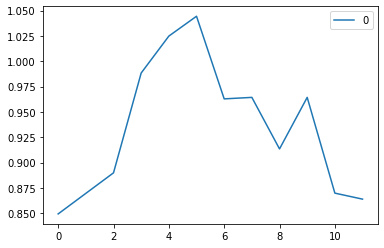

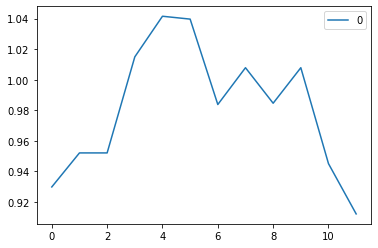

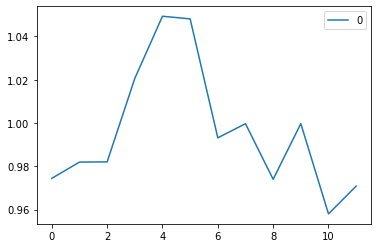

In [7]:
pd.DataFrame(B['A']['2011-08-23']).plot()
pd.DataFrame(B['AA']['2011-08-23']).plot()
pd.DataFrame(B['AAPL']['2011-08-23']).plot()

If you took the dot product between 

In [88]:
print(pd.DataFrame(CV['A']['2011-08-23']))

           0
0   0.849411
1   0.869684
2   0.889949
3   0.988463
4   1.024895
5   1.044481
6   0.962940
7   0.964405
8   0.913545
9   0.964405
10  0.869923
11  0.863996


and

In [89]:
print(pd.DataFrame(CV['AA']['2011-08-23']))
print(pd.DataFrame(CV['AAPL']['2011-08-23']))

           0
0   0.929839
1   0.952106
2   0.952106
3   1.014965
4   1.041554
5   1.039675
6   0.983788
7   1.007867
8   0.984629
9   1.007867
10  0.945082
11  0.912184
           0
0   0.974409
1   0.981919
2   0.982023
3   1.020604
4   1.049336
5   1.048124
6   0.993139
7   0.999678
8   0.973975
9   0.999678
10  0.957973
11  0.970823


for one day, but along every date, you'd get

In [96]:
context_sim_vecs.iloc[:3,:1]

,,2011-01-10
A,A,1.000000
AA,A,0.999497
AAPL,A,0.999926


Doing so for everyday, you'd get

,,2011-01-10,2011-01-11,2011-01-12,2011-01-13,2011-01-14,2011-01-18,2011-01-19,2011-01-20,2011-01-21,2011-01-24,...,2011-12-15,2011-12-16,2011-12-19,2011-12-20,2011-12-21,2011-12-22,2011-12-23,2011-12-27,2011-12-28,2011-12-29
A,A,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
AA,A,0.999497,0.999467,0.999480,0.999599,0.999739,0.999779,0.999770,0.999774,0.999697,0.999461,...,0.999437,0.999345,0.999420,0.999375,0.999461,0.999642,0.999783,0.999741,0.999805,0.999832
AAPL,A,0.999926,0.999970,0.999865,0.999827,0.999906,0.999918,0.999843,0.999853,0.999872,0.999830,...,0.999714,0.999920,0.999892,0.999932,0.999957,0.999934,0.999908,0.999954,0.999971,0.999929


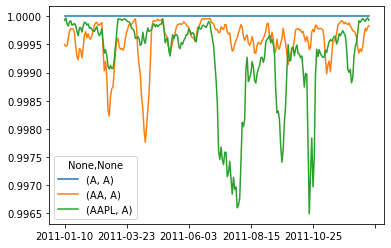

In [99]:
context_sim_vecs.iloc[:3,:].T.plot()
context_sim_vecs.iloc[:3,:]

In [8]:
C = context_sim_vecs
C

,,2011-01-10,2011-01-11,2011-01-12,2011-01-13,2011-01-14,2011-01-18,2011-01-19,2011-01-20,2011-01-21,2011-01-24,...,2011-12-15,2011-12-16,2011-12-19,2011-12-20,2011-12-21,2011-12-22,2011-12-23,2011-12-27,2011-12-28,2011-12-29
A,A,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
AA,A,0.999497,0.999467,0.999480,0.999599,0.999739,0.999779,0.999770,0.999774,0.999697,0.999461,...,0.999437,0.999345,0.999420,0.999375,0.999461,0.999642,0.999783,0.999741,0.999805,0.999832
AAPL,A,0.999926,0.999970,0.999865,0.999827,0.999906,0.999918,0.999843,0.999853,0.999872,0.999830,...,0.999714,0.999920,0.999892,0.999932,0.999957,0.999934,0.999908,0.999954,0.999971,0.999929
ABC,A,0.999910,0.999915,0.999880,0.999846,0.999882,0.999836,0.999723,0.999672,0.999737,0.999802,...,0.999646,0.999884,0.999892,0.999930,0.999926,0.999909,0.999904,0.999913,0.999926,0.999941
ABKFQ,A,0.999315,0.999368,0.999461,0.999451,0.992482,0.990366,0.994092,0.984703,0.973809,0.975275,...,0.999501,0.999695,0.999751,0.989874,0.983607,0.990310,0.990358,0.980857,0.982062,0.991569
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
XRX,ZMH,0.999853,0.999707,0.999611,0.999669,0.999658,0.999415,0.999062,0.998848,0.998702,0.998615,...,0.999602,0.999579,0.999279,0.999196,0.999252,0.999264,0.999259,0.999404,0.999739,0.999881
YHOO,ZMH,0.999523,0.999467,0.999277,0.999170,0.999164,0.999233,0.999340,0.999383,0.999409,0.999419,...,0.999598,0.999515,0.999558,0.999643,0.999679,0.999751,0.999748,0.999841,0.999933,0.999928
YUM,ZMH,0.999803,0.999653,0.999533,0.999574,0.999592,0.999562,0.999487,0.999370,0.999322,0.999230,...,0.999437,0.999423,0.999228,0.999009,0.999093,0.999158,0.999245,0.999423,0.999620,0.999889
ZION,ZMH,0.999412,0.999334,0.999450,0.999433,0.999287,0.999491,0.999592,0.999541,0.999579,0.999542,...,0.999793,0.999844,0.999808,0.999851,0.999895,0.999883,0.999810,0.999753,0.999792,0.999709


<AxesSubplot:>

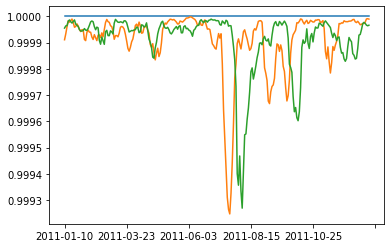

In [9]:
context_sim_vecs.T['KO']["KO"].plot()
context_sim_vecs.T['KO']["PEP"].plot()
context_sim_vecs.T['KO']["SPY"].plot()
#context_sim_vec
# s.T['AA']["SPY"].plot()
#context_sim_vecs.T['AA']["AMD"].plot()
#context_sim_vecs.T['AA']["XOM"].plot()

## Recovering Square Matrix
From the similarity vectors, C, I'll get the final matrix which will be square and term-term.

I used pandas multi-indexer to slice C into 575 groups. Each matrix represents a stock and it contains the dot products between all stocks and itself.
 
 I've shown a messy graph for stock 'A'. Notice it's all relative to 'A', which is a straight line at 1. Each stock has this, with itself being the vector of reference.

<AxesSubplot:>

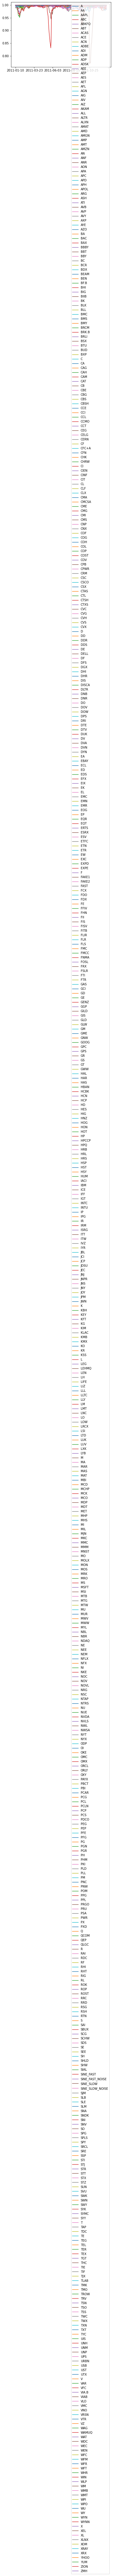

In [10]:
C.T['A'].plot() # 

In [11]:
C.T['A']

,A,AA,AAPL,ABC,ABKFQ,ABT,ACAS,ACE,ACN,ADBE,...,XEL,XL,XLNX,XOM,XRAY,XRX,YHOO,YUM,ZION,ZMH
2011-01-10,1.0,0.999497,0.999926,0.999910,0.999315,0.999661,0.999891,0.999524,0.999942,0.999903,...,0.999758,0.999860,0.999966,0.999927,0.999965,0.999854,0.999591,0.999869,0.999402,0.999899
2011-01-11,1.0,0.999467,0.999970,0.999915,0.999368,0.999766,0.999897,0.999691,0.999908,0.999901,...,0.999817,0.999893,0.999935,0.999936,0.999976,0.999843,0.999728,0.999848,0.999499,0.999871
2011-01-12,1.0,0.999480,0.999865,0.999880,0.999461,0.999631,0.999926,0.999622,0.999801,0.999935,...,0.999752,0.999899,0.999898,0.999875,0.999949,0.999847,0.999572,0.999749,0.999573,0.999823
2011-01-13,1.0,0.999599,0.999827,0.999846,0.999451,0.999618,0.999914,0.999623,0.999780,0.999923,...,0.999759,0.999844,0.999897,0.999839,0.999948,0.999853,0.999445,0.999752,0.999557,0.999822
2011-01-14,1.0,0.999739,0.999906,0.999882,0.992482,0.999794,0.999912,0.999787,0.999753,0.999904,...,0.999835,0.999829,0.999875,0.999858,0.999950,0.999879,0.999595,0.999835,0.999681,0.999834
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2011-12-22,1.0,0.999642,0.999934,0.999909,0.990310,0.999852,0.999871,0.999887,0.998905,0.999818,...,0.999871,0.999826,0.999890,0.999938,0.999775,0.999901,0.999816,0.999778,0.999775,0.999572
2011-12-23,1.0,0.999783,0.999908,0.999904,0.990358,0.999835,0.999858,0.999822,0.999196,0.999758,...,0.999778,0.999761,0.999855,0.999905,0.999789,0.999880,0.999748,0.999738,0.999681,0.999504
2011-12-27,1.0,0.999741,0.999954,0.999913,0.980857,0.999872,0.999810,0.999845,0.999524,0.999777,...,0.999797,0.999771,0.999863,0.999936,0.999832,0.999880,0.999690,0.999813,0.999692,0.999619
2011-12-28,1.0,0.999805,0.999971,0.999926,0.982062,0.999892,0.999785,0.999849,0.999594,0.999834,...,0.999789,0.999812,0.999868,0.999948,0.999805,0.999904,0.999699,0.999787,0.999742,0.999795


In [12]:
C.T['AA']

,A,AA,AAPL,ABC,ABKFQ,ABT,ACAS,ACE,ACN,ADBE,...,XEL,XL,XLNX,XOM,XRAY,XRX,YHOO,YUM,ZION,ZMH
2011-01-10,0.999497,1.0,0.999614,0.999552,0.999149,0.999940,0.999083,0.999953,0.999588,0.999199,...,0.999912,0.999453,0.999397,0.999614,0.999476,0.999859,0.999867,0.999776,0.999972,0.999524
2011-01-11,0.999467,1.0,0.999469,0.999455,0.998945,0.999884,0.999032,0.999900,0.999344,0.999144,...,0.999836,0.999248,0.999231,0.999477,0.999342,0.999815,0.999790,0.999756,0.999920,0.999291
2011-01-12,0.999480,1.0,0.999574,0.999463,0.999064,0.999859,0.999150,0.999899,0.999301,0.999283,...,0.999805,0.999215,0.999188,0.999396,0.999412,0.999811,0.999821,0.999850,0.999883,0.999243
2011-01-13,0.999599,1.0,0.999804,0.999640,0.999186,0.999913,0.999332,0.999931,0.999493,0.999520,...,0.999863,0.999386,0.999438,0.999513,0.999604,0.999820,0.999850,0.999902,0.999842,0.999373
2011-01-14,0.999739,1.0,0.999825,0.999770,0.992338,0.999922,0.999434,0.999900,0.999534,0.999629,...,0.999888,0.999530,0.999640,0.999678,0.999650,0.999853,0.999775,0.999877,0.999895,0.999419
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2011-12-22,0.999642,1.0,0.999485,0.999714,0.991767,0.999763,0.999527,0.999600,0.999591,0.999518,...,0.999458,0.999813,0.999766,0.999486,0.999848,0.999803,0.999326,0.999714,0.999035,0.998586
2011-12-23,0.999783,1.0,0.999515,0.999751,0.991711,0.999648,0.999702,0.999438,0.999309,0.999529,...,0.999383,0.999609,0.999604,0.999516,0.999679,0.999804,0.999290,0.999511,0.999156,0.998761
2011-12-27,0.999741,1.0,0.999564,0.999743,0.983949,0.999550,0.999793,0.999339,0.999288,0.999531,...,0.999268,0.999431,0.999499,0.999491,0.999584,0.999711,0.999045,0.999439,0.999225,0.998877
2011-12-28,0.999805,1.0,0.999705,0.999753,0.984606,0.999594,0.999811,0.999446,0.999313,0.999542,...,0.999357,0.999454,0.999554,0.999621,0.999582,0.999706,0.999166,0.999467,0.999456,0.999322


In [13]:
C.T['ZMH'] # 1's along the last column

,A,AA,AAPL,ABC,ABKFQ,ABT,ACAS,ACE,ACN,ADBE,...,XEL,XL,XLNX,XOM,XRAY,XRX,YHOO,YUM,ZION,ZMH
2011-01-10,0.999899,0.999524,0.999867,0.999784,0.999200,0.999680,0.999812,0.999584,0.999919,0.999817,...,0.999768,0.999833,0.999852,0.999891,0.999931,0.999853,0.999523,0.999803,0.999412,1.0
2011-01-11,0.999871,0.999291,0.999751,0.999792,0.999132,0.999649,0.999818,0.999595,0.999918,0.999810,...,0.999729,0.999859,0.999843,0.999894,0.999927,0.999707,0.999467,0.999653,0.999334,1.0
2011-01-12,0.999823,0.999243,0.999574,0.999842,0.999098,0.999591,0.999819,0.999547,0.999915,0.999845,...,0.999721,0.999834,0.999861,0.999906,0.999918,0.999611,0.999277,0.999533,0.999450,1.0
2011-01-13,0.999822,0.999373,0.999603,0.999837,0.998875,0.999577,0.999823,0.999538,0.999898,0.999904,...,0.999721,0.999820,0.999883,0.999902,0.999928,0.999669,0.999170,0.999574,0.999433,1.0
2011-01-14,0.999834,0.999419,0.999701,0.999837,0.992886,0.999630,0.999778,0.999611,0.999903,0.999933,...,0.999739,0.999864,0.999919,0.999908,0.999925,0.999658,0.999164,0.999592,0.999287,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2011-12-22,0.999572,0.998586,0.999724,0.999314,0.988149,0.999232,0.999497,0.999570,0.997506,0.999312,...,0.999610,0.999103,0.999379,0.999725,0.999020,0.999264,0.999751,0.999158,0.999883,1.0
2011-12-23,0.999504,0.998761,0.999740,0.999296,0.988675,0.999302,0.999526,0.999643,0.998047,0.999233,...,0.999578,0.999147,0.999475,0.999745,0.999154,0.999259,0.999748,0.999245,0.999810,1.0
2011-12-27,0.999619,0.998877,0.999756,0.999347,0.977942,0.999476,0.999377,0.999733,0.998786,0.999217,...,0.999662,0.999368,0.999573,0.999806,0.999352,0.999404,0.999841,0.999423,0.999753,1.0
2011-12-28,0.999795,0.999322,0.999838,0.999643,0.979462,0.999733,0.999569,0.999850,0.999257,0.999615,...,0.999779,0.999700,0.999778,0.999905,0.999589,0.999739,0.999933,0.999620,0.999792,1.0


Let's look at a word embedding from the language VSM. Notice it's a vector and the VSM itself is a matrix

In [128]:
pd.DataFrame(Language_VSM['youth'])

,youth
):,0.039805
);,0.304643
..,0.000000
...,0.000000
:(,0.438705
...,...
zero,0.000000
zinc,0.000000
zombie,0.369196
zone,0.001429


In [14]:
Language_VSM

,):,);,..,...,:(,:),:/,:D,:|,;p,...,younger,your,yourself,youth,zebra,zero,zinc,zombie,zone,zoo
):,5.016163,2.604290,0.000000,1.048333,3.985851,2.544724,3.169783,0.000000,0.711358,0.000000e+00,...,0.000000,1.117489,1.696178,0.039805,0.000000,0.000000,0.819383,1.313652,2.257390,0.000000
);,2.604290,8.153004,0.000000,0.000000,3.087538,0.000000,0.000000,0.945299,0.911658,0.000000e+00,...,0.375606,0.181663,0.000000,0.304643,1.330220,0.000000,1.329837,1.513951,0.139019,0.000000
..,0.000000,0.000000,7.693914,5.288714,0.183940,0.246891,2.258244,1.442898,0.000000,0.000000e+00,...,0.000000,0.002042,0.000000,0.000000,2.660728,0.679094,1.922747,0.000000,0.650041,0.000000
...,1.048333,0.000000,5.288714,5.385165,0.938484,1.576799,0.000000,0.000000,0.000000,0.000000e+00,...,0.000000,0.902859,0.452036,0.000000,2.955203,0.000000,0.000000,0.694033,0.020429,0.000000
:(,3.985851,3.087538,0.183940,0.938484,8.114452,5.874818,5.178121,4.768240,0.000000,0.000000e+00,...,0.000000,1.125635,1.055980,0.438705,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
zero,0.000000,0.000000,0.509329,0.087410,0.000000,0.000000,0.000000,0.103474,0.000000,0.000000e+00,...,0.000000,0.094475,0.176864,0.000000,0.000000,3.686874,0.000000,0.224785,0.278808,0.000000
zinc,0.819383,1.329837,1.922747,0.000000,0.000000,0.000000,0.000000,0.000000,4.075511,0.000000e+00,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.906670,0.000000,0.000000,0.000000
zombie,1.313652,1.513951,0.000000,0.694033,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,...,0.168225,0.933228,0.000000,0.369196,0.000000,0.000000,0.000000,8.488922,0.000000,0.000000
zone,1.797649,0.132032,0.467249,0.016222,0.000580,0.003971,0.012448,0.000211,0.000260,1.449646e-07,...,0.000069,0.007417,0.000185,0.001429,0.388992,0.272864,0.015675,0.002520,2.675446,0.000652


Returning to the current situaiton, for each matrix in C, we take the inner product of C[stock] and C[stock] transpose. 
This is leaves us with a square, 575 X 575 term-term matrix for *each* stock.

In [15]:
def magic(context_sim_vecs):
    Tensor = {}
    counter = 0
    for symbol in context_sim_vecs.T['A'].columns:
        df5 = context_sim_vecs.T[symbol]
        X = (np.matmul(df5.T,df5)/246).fillna(0)
        #X.replace([np.inf, -np.inf], 1, inplace=True)
        Tensor[symbol] = X
        counter+=1
    return Tensor
        # WHY IS IT SO UNSTABLE.
Tensor = magic(context_sim_vecs)

C:\Users\acers\AppData\Local\Temp/ipykernel_23120/930372756.py:6: FutureWarning: Calling a ufunc on non-aligned DataFrames (or DataFrame/Series combination). Currently, the indices are ignored and the result takes the index/columns of the first DataFrame. In the future , the DataFrames/Series will be aligned before applying the ufunc.
Convert one of the arguments to a NumPy array (eg 'ufunc(df1, np.asarray(df2)') to keep the current behaviour, or align manually (eg 'df1, df2 = df1.align(df2)') before passing to the ufunc to obtain the future behaviour and silence this warning.
  X = (np.matmul(df5.T,df5)/246).fillna(0)


In [16]:
Tensor; # it's a dictionary of matrices

It gets murky here for sure, but I'm pretty sure since the underlying values of this market VSM are vectors and not scalars, there's an extra axis. Which means the market VSM is actually a *tensor* and not a matrix. Therefore the embeddings themselves are *matrices* and not vectors. 

Notice the diagonal of 1's that appears in the Tensor, that's a good sign.

In [132]:
Tensor['A']

,0,1,2,3,4,5,6,7,8,9,...,565,566,567,568,569,570,571,572,573,574
A,1.000000,0.999583,0.999250,0.999486,0.994146,0.999404,0.999491,0.999439,0.999503,0.999587,...,0.999408,0.999507,0.999577,0.999457,0.999668,0.999643,0.999294,0.999468,0.999634,0.999495
AA,0.999583,0.999167,0.998833,0.999070,0.993732,0.998988,0.999074,0.999022,0.999086,0.999170,...,0.998992,0.999090,0.999160,0.999041,0.999252,0.999227,0.998878,0.999052,0.999217,0.999078
AAPL,0.999250,0.998833,0.998500,0.998736,0.993400,0.998655,0.998741,0.998689,0.998753,0.998836,...,0.998659,0.998757,0.998827,0.998707,0.998918,0.998893,0.998544,0.998719,0.998884,0.998745
ABC,0.999486,0.999070,0.998736,0.998972,0.993635,0.998891,0.998977,0.998925,0.998989,0.999073,...,0.998895,0.998993,0.999063,0.998943,0.999154,0.999130,0.998780,0.998955,0.999120,0.998981
ABKFQ,0.994146,0.993732,0.993400,0.993635,0.988363,0.993554,0.993639,0.993588,0.993652,0.993735,...,0.993558,0.993655,0.993725,0.993606,0.993816,0.993791,0.993443,0.993617,0.993782,0.993644
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
XRX,0.999643,0.999227,0.998893,0.999130,0.993791,0.999048,0.999134,0.999082,0.999146,0.999230,...,0.999052,0.999150,0.999220,0.999101,0.999312,0.999287,0.998938,0.999112,0.999277,0.999138
YHOO,0.999294,0.998878,0.998544,0.998780,0.993443,0.998699,0.998785,0.998733,0.998797,0.998881,...,0.998703,0.998801,0.998871,0.998751,0.998962,0.998938,0.998589,0.998763,0.998928,0.998789
YUM,0.999468,0.999052,0.998719,0.998955,0.993617,0.998873,0.998959,0.998907,0.998971,0.999055,...,0.998877,0.998975,0.999045,0.998926,0.999137,0.999112,0.998763,0.998937,0.999102,0.998963
ZION,0.999634,0.999217,0.998884,0.999120,0.993782,0.999038,0.999125,0.999073,0.999137,0.999221,...,0.999042,0.999141,0.999211,0.999091,0.999302,0.999277,0.998928,0.999102,0.999268,0.999129


In [133]:
Tensor['AA']

,0,1,2,3,4,5,6,7,8,9,...,565,566,567,568,569,570,571,572,573,574
A,0.999167,0.999583,0.999001,0.999115,0.994195,0.998972,0.999298,0.999161,0.999142,0.999152,...,0.998988,0.999221,0.999216,0.999128,0.999303,0.999297,0.998875,0.999035,0.999301,0.999106
AA,0.999583,1.000000,0.999417,0.999531,0.994609,0.999389,0.999714,0.999577,0.999559,0.999569,...,0.999404,0.999638,0.999632,0.999544,0.999720,0.999713,0.999291,0.999452,0.999717,0.999522
AAPL,0.999001,0.999417,0.998835,0.998949,0.994030,0.998806,0.999132,0.998995,0.998976,0.998986,...,0.998822,0.999055,0.999050,0.998962,0.999137,0.999130,0.998709,0.998869,0.999135,0.998940
ABC,0.999115,0.999531,0.998949,0.999063,0.994143,0.998920,0.999246,0.999109,0.999090,0.999100,...,0.998936,0.999169,0.999164,0.999076,0.999251,0.999244,0.998823,0.998983,0.999249,0.999054
ABKFQ,0.994195,0.994609,0.994030,0.994143,0.989276,0.994002,0.994325,0.994189,0.994171,0.994180,...,0.994017,0.994249,0.994244,0.994156,0.994331,0.994324,0.993904,0.994064,0.994329,0.994134
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
XRX,0.999297,0.999713,0.999130,0.999244,0.994324,0.999102,0.999427,0.999290,0.999272,0.999282,...,0.999117,0.999351,0.999345,0.999257,0.999433,0.999426,0.999004,0.999165,0.999430,0.999235
YHOO,0.998875,0.999291,0.998709,0.998823,0.993904,0.998680,0.999005,0.998868,0.998850,0.998860,...,0.998696,0.998929,0.998924,0.998835,0.999011,0.999004,0.998583,0.998743,0.999008,0.998813
YUM,0.999035,0.999452,0.998869,0.998983,0.994064,0.998841,0.999166,0.999029,0.999011,0.999020,...,0.998856,0.999090,0.999084,0.998996,0.999171,0.999165,0.998743,0.998904,0.999169,0.998974
ZION,0.999301,0.999717,0.999135,0.999249,0.994329,0.999106,0.999432,0.999294,0.999276,0.999286,...,0.999122,0.999355,0.999350,0.999262,0.999437,0.999430,0.999008,0.999169,0.999435,0.999240


In [135]:
Tensor['AAPL']

,0,1,2,3,4,5,6,7,8,9,...,565,566,567,568,569,570,571,572,573,574
A,0.998500,0.998668,0.999250,0.998928,0.993555,0.998959,0.998745,0.998915,0.998918,0.998851,...,0.999001,0.998817,0.998890,0.998989,0.998921,0.998812,0.998650,0.998995,0.998639,0.998902
AA,0.998668,0.998835,0.999417,0.999095,0.993722,0.999127,0.998913,0.999082,0.999085,0.999018,...,0.999169,0.998984,0.999057,0.999156,0.999089,0.998979,0.998817,0.999163,0.998807,0.999069
AAPL,0.999250,0.999417,1.000000,0.999678,0.994301,0.999710,0.999495,0.999665,0.999668,0.999601,...,0.999751,0.999566,0.999639,0.999739,0.999671,0.999561,0.999400,0.999745,0.999389,0.999652
ABC,0.998928,0.999095,0.999678,0.999355,0.993980,0.999387,0.999173,0.999342,0.999346,0.999279,...,0.999429,0.999244,0.999317,0.999417,0.999349,0.999239,0.999078,0.999423,0.999067,0.999329
ABKFQ,0.993555,0.993722,0.994301,0.993980,0.988668,0.994012,0.993799,0.993967,0.993971,0.993904,...,0.994054,0.993870,0.993942,0.994041,0.993974,0.993865,0.993705,0.994048,0.993694,0.993955
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
XRX,0.998812,0.998979,0.999561,0.999239,0.993865,0.999271,0.999057,0.999226,0.999230,0.999163,...,0.999313,0.999128,0.999201,0.999301,0.999233,0.999123,0.998962,0.999307,0.998951,0.999213
YHOO,0.998650,0.998817,0.999400,0.999078,0.993705,0.999110,0.998895,0.999065,0.999068,0.999001,...,0.999151,0.998967,0.999040,0.999139,0.999071,0.998962,0.998800,0.999145,0.998789,0.999052
YUM,0.998995,0.999163,0.999745,0.999423,0.994048,0.999455,0.999240,0.999410,0.999413,0.999346,...,0.999497,0.999312,0.999385,0.999484,0.999417,0.999307,0.999145,0.999491,0.999134,0.999397
ZION,0.998639,0.998807,0.999389,0.999067,0.993694,0.999099,0.998884,0.999054,0.999057,0.998990,...,0.999140,0.998956,0.999029,0.999128,0.999061,0.998951,0.998789,0.999134,0.998779,0.999041


### Final Output
Okay, so all of the operations done in vsm.py assume a 2d matrix VSM. They're simple functions, like taking the distance between a pair of vectors (pretty much vsm.neighbors). All of these operations are equally definable for matrices and I know the math for it but I don't know to code it (I think you need pytorch for tensors). 

So to make a prototype, I made a matrix from the Tensor by selecting one vector from the stock embeddings (which are matrices) that represented a direct measurement. I'll just show what I did, since it's a bit arbitrary and confusing.

In [18]:
Tensor['A']

,0,1,2,3,4,5,6,7,8,9,...,565,566,567,568,569,570,571,572,573,574
A,1.000000,0.999583,0.999250,0.999486,0.994146,0.999404,0.999491,0.999439,0.999503,0.999587,...,0.999408,0.999507,0.999577,0.999457,0.999668,0.999643,0.999294,0.999468,0.999634,0.999495
AA,0.999583,0.999167,0.998833,0.999070,0.993732,0.998988,0.999074,0.999022,0.999086,0.999170,...,0.998992,0.999090,0.999160,0.999041,0.999252,0.999227,0.998878,0.999052,0.999217,0.999078
AAPL,0.999250,0.998833,0.998500,0.998736,0.993400,0.998655,0.998741,0.998689,0.998753,0.998836,...,0.998659,0.998757,0.998827,0.998707,0.998918,0.998893,0.998544,0.998719,0.998884,0.998745
ABC,0.999486,0.999070,0.998736,0.998972,0.993635,0.998891,0.998977,0.998925,0.998989,0.999073,...,0.998895,0.998993,0.999063,0.998943,0.999154,0.999130,0.998780,0.998955,0.999120,0.998981
ABKFQ,0.994146,0.993732,0.993400,0.993635,0.988363,0.993554,0.993639,0.993588,0.993652,0.993735,...,0.993558,0.993655,0.993725,0.993606,0.993816,0.993791,0.993443,0.993617,0.993782,0.993644
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
XRX,0.999643,0.999227,0.998893,0.999130,0.993791,0.999048,0.999134,0.999082,0.999146,0.999230,...,0.999052,0.999150,0.999220,0.999101,0.999312,0.999287,0.998938,0.999112,0.999277,0.999138
YHOO,0.999294,0.998878,0.998544,0.998780,0.993443,0.998699,0.998785,0.998733,0.998797,0.998881,...,0.998703,0.998801,0.998871,0.998751,0.998962,0.998938,0.998589,0.998763,0.998928,0.998789
YUM,0.999468,0.999052,0.998719,0.998955,0.993617,0.998873,0.998959,0.998907,0.998971,0.999055,...,0.998877,0.998975,0.999045,0.998926,0.999137,0.999112,0.998763,0.998937,0.999102,0.998963
ZION,0.999634,0.999217,0.998884,0.999120,0.993782,0.999038,0.999125,0.999073,0.999137,0.999221,...,0.999042,0.999141,0.999211,0.999091,0.999302,0.999277,0.998928,0.999102,0.999268,0.999129


In [19]:
A = Tensor['A'].T['A']
pd.DataFrame(A)

,A
0,1.000000
1,0.999583
2,0.999250
3,0.999486
4,0.994146
...,...
570,0.999643
571,0.999294
572,0.999468
573,0.999634


In [152]:
AA = Tensor['AA'].T['AA']
pd.DataFrame(AA)

,AA
0,0.999583
1,1.000000
2,0.999417
3,0.999531
4,0.994609
...,...
570,0.999713
571,0.999291
572,0.999452
573,0.999717


In [159]:
# continuing for rest of stocks
open = {}
for matrix in Tensor:
    vec = Tensor[matrix].T[matrix]
    open[matrix] = vec
vsm2 = pd.DataFrame(open)
vsm2.index = vsm2.columns
vsm2

,A,AA,AAPL,ABC,ABKFQ,ABT,ACAS,ACE,ACN,ADBE,...,XEL,XL,XLNX,XOM,XRAY,XRX,YHOO,YUM,ZION,ZMH
A,1.000000,0.999583,0.999250,0.999486,0.994146,0.999404,0.999491,0.999439,0.999503,0.999587,...,0.999408,0.999507,0.999577,0.999457,0.999668,0.999643,0.999294,0.999468,0.999634,0.999495
AA,0.999583,1.000000,0.999417,0.999531,0.994609,0.999389,0.999714,0.999577,0.999559,0.999569,...,0.999404,0.999638,0.999632,0.999544,0.999720,0.999713,0.999291,0.999452,0.999717,0.999522
AAPL,0.999250,0.999417,1.000000,0.999678,0.994301,0.999710,0.999495,0.999665,0.999668,0.999601,...,0.999751,0.999566,0.999639,0.999739,0.999671,0.999561,0.999400,0.999745,0.999389,0.999652
ABC,0.999486,0.999531,0.999678,1.000000,0.994258,0.999858,0.999549,0.999802,0.999666,0.999706,...,0.999851,0.999756,0.999725,0.999791,0.999788,0.999688,0.999508,0.999814,0.999439,0.999761
ABKFQ,0.994146,0.994609,0.994301,0.994258,1.000000,0.994247,0.994252,0.994582,0.994447,0.994220,...,0.994427,0.994400,0.994473,0.994512,0.994322,0.994299,0.994276,0.994256,0.994134,0.994600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
XRX,0.999643,0.999713,0.999561,0.999688,0.994299,0.999684,0.999634,0.999723,0.999710,0.999777,...,0.999669,0.999780,0.999690,0.999711,0.999804,1.000000,0.999425,0.999692,0.999719,0.999672
YHOO,0.999294,0.999291,0.999400,0.999508,0.994276,0.999493,0.999272,0.999457,0.999365,0.999429,...,0.999491,0.999458,0.999518,0.999527,0.999464,0.999425,1.000000,0.999517,0.999312,0.999436
YUM,0.999468,0.999452,0.999745,0.999814,0.994256,0.999871,0.999456,0.999748,0.999670,0.999689,...,0.999867,0.999674,0.999733,0.999769,0.999794,0.999692,0.999517,1.000000,0.999456,0.999753
ZION,0.999634,0.999717,0.999389,0.999439,0.994134,0.999422,0.999566,0.999543,0.999527,0.999614,...,0.999433,0.999607,0.999525,0.999589,0.999669,0.999719,0.999312,0.999456,1.000000,0.999551


This is nearly the Market VSM you saw in the 1st notebook. There's no weighting yet. I amplify co-occurances that are unusually high by applying an observed/expected type of thing called pointwise mutual information (pmi), and that's the final matrix. I'll go into more detail on matrix re-weighting some other time.

In [161]:
Market_VSM = vsm.pmi(vsm2)
Market_VSM

,A,AA,AAPL,ABC,ABKFQ,ABT,ACAS,ACE,ACN,ADBE,...,XEL,XL,XLNX,XOM,XRAY,XRX,YHOO,YUM,ZION,ZMH
A,0.000626,0.000131,0.000000,0.000000,0.000000,0.000000,0.000102,0.000000e+00,0.000000,0.000054,...,0.000000,0.000000,0.000043,0.000000,0.000064,0.000082,0.000004,0.000000,0.000191,0.000000
AA,0.000131,0.000469,0.000000,0.000000,0.000257,0.000000,0.000248,0.000000e+00,0.000000,0.000000,...,0.000000,0.000014,0.000021,0.000000,0.000038,0.000073,0.000000,0.000000,0.000196,0.000000
AAPL,0.000000,0.000000,0.000426,0.000039,0.000000,0.000070,0.000007,9.344456e-07,0.000051,0.000000,...,0.000101,0.000000,0.000007,0.000047,0.000000,0.000000,0.000010,0.000100,0.000000,0.000031
ABC,0.000000,0.000000,0.000039,0.000296,0.000000,0.000154,0.000000,7.322912e-05,0.000000,0.000009,...,0.000135,0.000046,0.000028,0.000034,0.000019,0.000000,0.000054,0.000103,0.000000,0.000076
ABKFQ,0.000000,0.000257,0.000000,0.000000,0.010855,0.000000,0.000000,1.183501e-04,0.000029,0.000000,...,0.000000,0.000000,0.000039,0.000019,0.000000,0.000000,0.000085,0.000000,0.000000,0.000180
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
XRX,0.000082,0.000073,0.000000,0.000000,0.000000,0.000000,0.000058,0.000000e+00,0.000006,0.000057,...,0.000000,0.000048,0.000000,0.000000,0.000014,0.000252,0.000000,0.000000,0.000089,0.000000
YHOO,0.000004,0.000000,0.000010,0.000054,0.000085,0.000037,0.000000,0.000000e+00,0.000000,0.000000,...,0.000025,0.000000,0.000070,0.000020,0.000000,0.000000,0.000795,0.000055,0.000000,0.000000
YUM,0.000000,0.000000,0.000100,0.000103,0.000000,0.000160,0.000000,1.213778e-05,0.000000,0.000000,...,0.000144,0.000000,0.000029,0.000005,0.000019,0.000000,0.000055,0.000283,0.000000,0.000060
ZION,0.000191,0.000196,0.000000,0.000000,0.000000,0.000000,0.000109,0.000000e+00,0.000000,0.000013,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000089,0.000000,0.000000,0.000488,0.000000


Even though there's a huge loss of information from Tensor to matrix, the co-integration results using this vsm are still quite interesting. But that's pretty much how you go from raw daily returns to the vsm. 